<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера</b>
    
    
Георгий, привет! Меня зовут Даниил Вяжев, я буду проверять твой проект

Сразу хочу обратить внимание на цветовую разметку:

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Зеленым с пометкой ✔️ отмечены отличные решения и идеи, которые можно и нужно использовать в будущем.
</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Желтым с пометкой ⚠️ отмечено то, что можно или нужно оптимизировать, в зависимости от контекста.</div>    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Красным с пометкой ❌ обозначены пропущенные пункты задания и ошибки, которые обязательно надо будет исправить, чтобы результаты были верные.</div> 
    
**Ответы на мои комментарии или доработки по моим рекомендациям попрошу выделить каким-нибудь цветом, кроме перечисленных.**
Также я попрошу тебя **не менять, не передвигать и не удалять мои комментарии**, чтобы при последующей проверке мне было проще ориентироваться.
        
<hr>
    
<font color= 'dodgerblue'>**По проекту:**</font> 
    
Георгий, ты проделал отличную работу по подготовке данных, их анализу и построению рекомендаций. Код структурирован, что делает его понятным и легко читаемым, а также позволяет уверенно следовать всем этапам — от загрузки данных до оценки качества рекомендаций. Ты применил классические метрики для оценки рекомендаций, что говорит о правильном понимании задачи и используемых методах.

Твоя работа с холодными пользователями, а также внедрение модели ALS для персонализированных рекомендаций показывают грамотный подход к решению проблемы рекомендаций. Это особенно важно при холодном старте, где многие системы испытывают трудности. Ты также продемонстрировал успешное использование ранжирующих моделей, что подтверждается увеличением метрик точности и полноты после добавления пользовательских признаков.

Однако, метрики `precision` и `recall` остаются низкими, несмотря на прогресс после добавления признаков. Это может означать, что есть пространство для улучшений в части более детальной настройки модели или расширения набора признаков. Например, можно попробовать более сложные модели или другие подходы к работе с пользовательскими предпочтениями.

Твоя работа с обработкой `NaN` значений требует немного больше внимания, так как они могут влиять на итоговые результаты рекомендаций. Также рекомендую оптимизировать память при объединении крупных датафреймов, чтобы снизить нагрузку на систему при работе с большими объемами данных.

В целом, ты выполнил задание на высоком уровне, показав глубокое понимание процесса построения рекомендаций и их оценки. Отличная работа! Удачи в будущих спринтах!

    
<hr style="border-top: 3px solid purple; "></hr>
Комментарии можешь оставлять с помощью такого кода в Markdown ячейке:
    
    
    <div class="alert alert-info">
    <h2> Комментарий студента</h2>

    Тут текст.
    </div>
    
    
    <font color='red'> Этот код позволяет менять цвет текста. </font>     


  

О том, как **форматировать текст** в Markdown ячейке или как добавлять ссылки, ты можешь узнать [тут](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet) и [вот тут](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd).



Желаю удачи!

<img src="https://user-images.githubusercontent.com/74038190/225813708-98b745f2-7d22-48cf-9150-083f1b00d6c9.gif" width="500">
</div>    



# Создание рекомендательной системы. Часть 1

***Заказчик***: **Яндекс Музыка**

***Цель***: Выполнить исследования данных и методов машинного обучения для создания персональных рекомендаций с целью облегчения пользовательского опыта.

***Гипотеза***: Применение двустадийного подхода и использование дополнительных признаков позволит создавать наиболее релевантные персональные рекомендации.

***Ожидаемый результат***: набор скриптов в репозитории, выполнение которых позволит рассчитать персональные рекомендации, а затем запустить соответствующий сервис.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Молодец, что оставил задачи и цели проекта, так он выглядит презентабельнее и поможет вспомнить о чем был проект, когда ты к нему вернешься.
</div>



# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [218]:
import boto3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn.metrics
import sklearn.preprocessing
from implicit.als import AlternatingLeastSquares
from catboost import CatBoostClassifier, Pool
from dotenv import load_dotenv
from tqdm import tqdm
import os
import sys

In [219]:
load_dotenv()

True

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [220]:
tracks = pd.read_parquet("./tracks.parquet")

In [221]:
catalog = pd.read_parquet("./catalog_names.parquet")

In [222]:
interactions = pd.read_parquet("./interactions.parquet")

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [223]:
tracks.info()
tracks.sample(5).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


,424060,331714,931612,921810,362982
track_id,29245150,21586606,80896574,79123762,24344272
albums,[3515090],[2473490],[14877495],[14336137],[2835191]
artists,[101616],[218250],[6472888],[11061240],[3467559]
genres,[13],"[55, 112]",[21],"[11, 20]",[16]


В таблице *tracks* присутсвуют данные по следующим признакам:

- *track_id* — идентификатор музыкального трека;

- *albums* — список идентификаторов альбомов, содержащих трек;

- *artists* — список идентификаторов исполнителей трека;

- *genres* — список идентификаторов жанров, к которым принадлежит трек.

Всего 1 млн. записей, явные пропуски отсутсвуют. Частично таблица содержит числа, а частично списки с числами.

In [224]:
catalog.info()
catalog.sample(5).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


,461158,1754316,607087,1808117,393496
id,9672596,83290605,16821988,98472991,7250373
type,album,track,album,track,album
name,Astronomia,Finale,Sub Lite Woof,Too Late,Emotional Chamber Trailers


В таблице *catalog* присутсвуют данные по следующим признакам:

- *id* — идентификатор одной из каталожных единиц (трека, альбома, исполнителя, жанра);

- *type* — тип идентификатора;

- *name* —  имя (название) каталожной единицы.

Всего в таблице 1,8 млн. значений, явные пропуски отсутсвуют. В ячейках размещен текст.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ⚠️</b>
    
Выводы о том, что явные пропуски отсутствуют, основаны только на вызовах `.info()`. Однако это не гарантирует отсутствие дубликатов или скрытых проблем, таких как пустые строки или некорректные значения. Советую дополнить код вызовами `duplicated` и `isnull`.
</div>



In [225]:
interactions.info()
interactions.sample(5).T

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


,557,623,29,159,14
user_id,463692,850075,685378,791182,740401
track_id,37078225,32783925,732401,62100563,595258
track_seq,558,624,30,160,15
started_at,2022-10-27 00:00:00,2022-09-05 00:00:00,2022-05-23 00:00:00,2022-10-14 00:00:00,2022-05-22 00:00:00


В таблице *interactions* присутсвуют данные по следующим признакам:

- *user_id* — идентификатор пользователя;

- *track_id* — идентификатор музыкального трека;

- *track_seq* — номер места трека в истории пользователя;

- *started_at* — дата начала прослушивания трека.

Всего в таблице содержится 223 млн. записей о прослушанных пользователями треках за 2022 год. Ячейки заполненены целыми числами. Явные пропуски отсутсвуют.

***Вывод:***

Были загружены и просмотрены исходные данные, в которых остутсвуют явные проблемы и пропуски.

# EDA

Построим распределение количества прослушанных треков по времени.

In [226]:
interactions.describe()

,user_id,track_id,track_seq,started_at
count,2.226299e+08,2.226299e+08,2.226299e+08,222629898
mean,6.875767e+05,3.653622e+07,4.621403e+02,2022-08-29 16:39:44.541336320
min,0.000000e+00,2.600000e+01,1.000000e+00,2022-01-01 00:00:00
25%,3.433710e+05,1.480849e+07,5.600000e+01,2022-07-02 00:00:00
50%,6.879730e+05,3.552474e+07,1.810000e+02,2022-09-15 00:00:00
75%,1.031127e+06,5.651137e+07,5.060000e+02,2022-11-09 00:00:00
max,1.374582e+06,1.015218e+08,1.663700e+04,2022-12-31 00:00:00
std,3.969033e+05,2.661782e+07,8.257312e+02,NaN


Основные статистические показатели говорят что второй и третий квартили прослушиваний были между июлем и ноябрем 2022 года.

<Axes: >

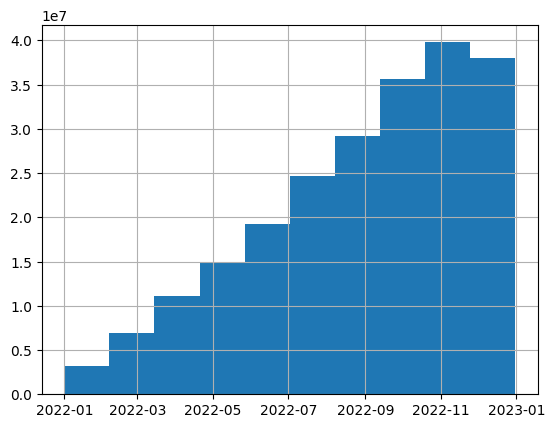

In [227]:
interactions['started_at'].hist()

Количество прослушанных треков по месяцам росло линейно.

<Axes: xlabel='started_at'>

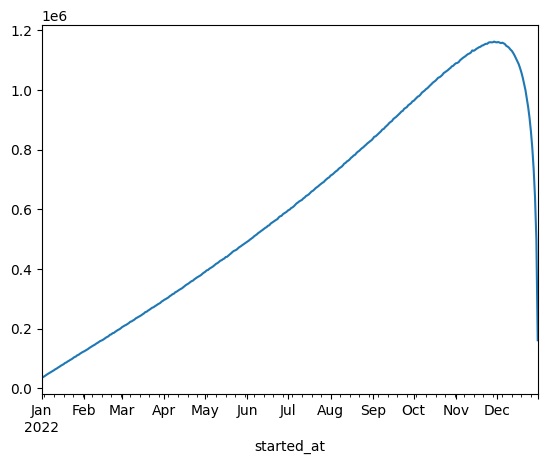

In [228]:
# распределение книг по годам публикации
interactions['started_at'].value_counts().sort_index().plot()

Распределение количество прослушиваний в течении года расло равномерно, но с середины ноября ушло в ноль.

---

Далее изучим наиболее популярные треки.

In [229]:
track_chart = interactions.groupby('track_id').count().sort_values('user_id', ascending = False)['user_id']

<Axes: >

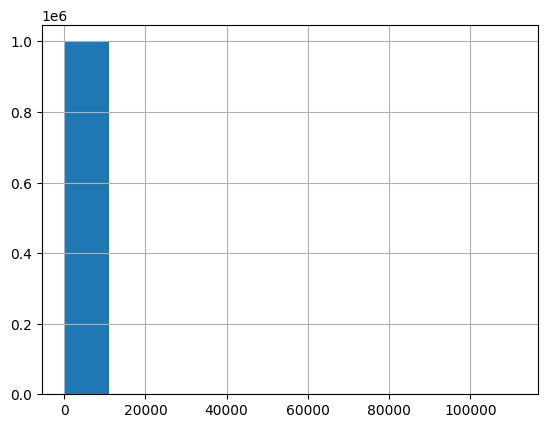

In [230]:
track_chart.hist()

In [231]:
q1 = track_chart.quantile(0.25)
q3 = track_chart.quantile(0.75)
iqr = q3 - q1

In [232]:
tracks_without_outliers = track_chart[track_chart.between(q1 - 1.5 * iqr, q3 + 1.5 * iqr)].index
tracks_without_outliers

Index([46561976,  9447169, 44742298, 17191009, 24629122,  2286217,  4209893,
       24629079, 23527801, 74077966,
       ...
       84383212, 84383626, 84385833, 84386822, 84390115, 84391078, 84391079,
       84391080, 34766819, 34766901],
      dtype='int32', name='track_id', length=846573)

<Axes: >

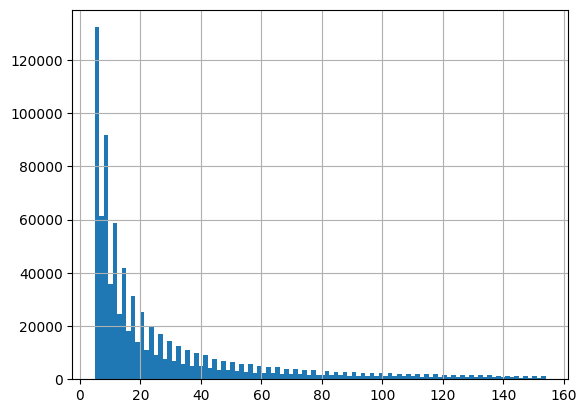

In [233]:
track_chart[tracks_without_outliers].hist(bins=100)

In [234]:
pop_tracks_150 = track_chart[track_chart>150].index

In [235]:
catalog[catalog['id'].isin(track_chart.index[:12])]['name']

821569     Smells Like Teen Spirit
839136                        Numb
902932           Shape Of My Heart
1009736          Seven Nation Army
1180543             Way Down We Go
1287760               Shape of You
1296347                   Believer
1324628                 I Got Love
1459708                       Life
1508577                 In The End
1591752            Blinding Lights
1641791                     Юность
Name: name, dtype: object

В общем Кобейн и Бенингтон живы!

---

Изучим наиболее популярные жанры

In [236]:
genres_chart = tracks[tracks['track_id'].isin(track_chart.index[:5])]['genres']

In [237]:
genres = []
for i in genres_chart:
    genres.extend(i)
genres

[13, 14, 102, 41, 47, 14, 102, 3, 75, 11, 20]

In [238]:
set(genres)

{3, 11, 13, 14, 20, 41, 47, 75, 102}

In [239]:
top_genres = catalog[catalog['id'].isin(set(genres))]
top_genres = top_genres[top_genres['type']=='genre']
top_genres

,id,type,name
812308,3,genre,rusrap
812316,11,genre,pop
812318,13,genre,alternative
812319,14,genre,rock
812325,20,genre,ruspop
812346,41,genre,numetal
812352,47,genre,metal
812380,75,genre,rap
812407,102,genre,allrock


Наиболее популярными оказались русский рэп и поп. К сожалению...

---

Найдем треки, которые никто не прослушал

In [240]:
track_list = interactions['track_id'].unique()

In [241]:
track_list_all = catalog[catalog['type']=='track']['id'].unique()

In [242]:
len(track_list)/len(track_list_all)

1.0

In [243]:
missed_tracks = np.setdiff1d(track_list, track_list_all)

In [244]:
missed_tracks

array([], dtype=int32)

В пердоставленных данных отсутствуют треки, которые никто ни разу не слушал.

---

Изучим наиболее активных пользователей

In [245]:
user_activity = events \
    .groupby(["user_id"]).agg(items=("item_id", "nunique"))\
.sort_values("items", ascending=False).reset_index()

<Axes: >

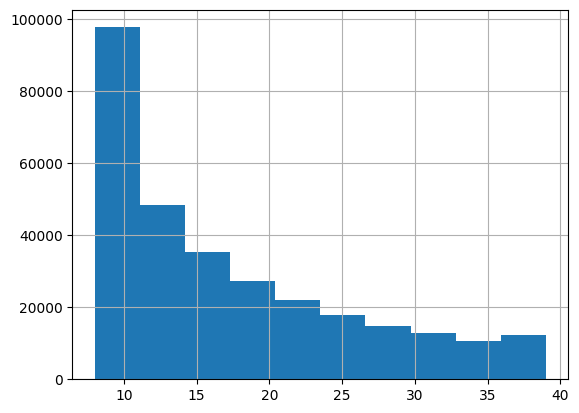

In [246]:
user_activity['items'].hist()

In [247]:
q1 = user_activity['items'].quantile(0.25)
q3 = user_activity['items'].quantile(0.75)
iqr = q3 - q1
print(q1, q3, iqr)

10.0 23.0 13.0


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ⚠️</b>
    
Код для вычисления выбросов повторяется дважды (для треков и пользователей). Для удобства и красоты можно вынести код вычисления выбросов в функцию, чтобы избежать дублирования.
</div>


In [248]:
activ_users_without_outliers = user_activity[user_activity['items'].between(q1 - 1.5 * iqr, q3 + 1.5 * iqr)]['user_id']
len(activ_users_without_outliers)

299092

<Axes: >

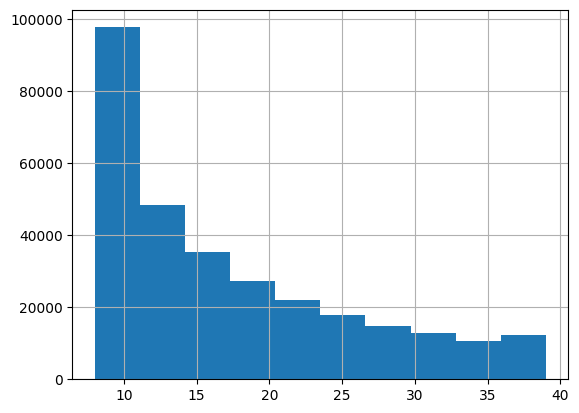

In [251]:
user_activity[user_activity['user_id'].isin(activ_users_without_outliers)]['items'].hist()

***Вывод:***

Были изучены распределения прослушанных треков по месяцам, активности пользователей и популярности треков. Были выделены треки и пользователи, популярность и активность которых не является выбросом.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Хороший вывод и код уже имеет хороший фундамент для исследования данных и выявления закономерностей для создания рекомендательной системы. 
</div>



# Преобразование данных

Данные не требуют значительных преобразований, но с целью сохранения единообразия названий признаков приведем их к единому виду.

In [252]:
events = interactions.rename(columns={'track_id': 'item_id'}).copy()
items = tracks.rename(columns={'track_id': 'item_id'}).copy()

#### Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [254]:
items.to_parquet("items.parquet")
items.to_parquet("items_raw.parquet")

In [255]:
events.to_parquet("events.parquet")
events.to_parquet("events_raw.parquet")

#### Очистка памяти

Выполним очистку памяти с целью высвобождения ресурсов для выполнения кода ниже. 

In [143]:
del tracks
del interactions
del items
del events

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [144]:
items = pd.read_parquet("./items.parquet")
events = pd.read_parquet("./events.parquet")
#catalog = pd.read_parquet("./catalog_names.parquet")

In [145]:
events.describe()

,user_id,item_id,track_seq,started_at
count,2.226299e+08,2.226299e+08,2.226299e+08,222629898
mean,6.875767e+05,3.653622e+07,4.621403e+02,2022-08-29 16:39:44.541336320
min,0.000000e+00,2.600000e+01,1.000000e+00,2022-01-01 00:00:00
25%,3.433710e+05,1.480849e+07,5.600000e+01,2022-07-02 00:00:00
50%,6.879730e+05,3.552474e+07,1.810000e+02,2022-09-15 00:00:00
75%,1.031127e+06,5.651137e+07,5.060000e+02,2022-11-09 00:00:00
max,1.374582e+06,1.015218e+08,1.663700e+04,2022-12-31 00:00:00
std,3.969033e+05,2.661782e+07,8.257312e+02,NaN


# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [146]:
train_test_global_time_split_date = pd.to_datetime("2022-12-16")#.date()

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

# количество пользователей, которые есть и в train, и в test
common_users = set(users_test).intersection(set(users_train))

print(len(users_train), len(users_test), len(common_users)) 

1342566 783525 752870


In [147]:
# количество холодных пользователей
cold_users = set(users_test).difference(set(users_train))
print(len(cold_users)) 

30655


# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [148]:
top_pop_start_date = pd.to_datetime("2022-12-16").date()

item_popularity = events_train \
    .query("started_at < @top_pop_start_date") \
    .groupby(["item_id"]).agg(users=("user_id", "nunique"))\
.sort_values("users", ascending=False).reset_index()
#item_popularity["popularity_weighted"] = item_popularity["users"] * item_popularity["avg_rating"]
item_popularity.head()

,item_id,users
0,53404,110026
1,33311009,101076
2,178529,100866
3,35505245,95523
4,24692821,84153


In [149]:
# выбираем первые 200 айтемов
top_k_pop_items = item_popularity.head(200)

In [150]:
# добавляем информацию о треках
top_k_pop_items = top_k_pop_items.merge(
    items.set_index("item_id")[["albums", "artists", "genres"]], on="item_id")

In [151]:
top_k_pop_items.to_parquet('top_popular.parquet')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Код разбиения данных корректный. Отмечается четкое разделение на тренировочную и тестовую выборки. Рассчет топ популярных треков выполнен корректно. Нет существенных замечаний.
</div>



# Персональные

Рассчитаем объем, который займет матрица со всеми событиями.

In [156]:
user_item_matrix = events['user_id'].nunique() * events['item_id'].nunique() / (1024 ** 3)
user_item_matrix

1278.911717236042

Получилось более террабайта. Рассчитаем персональные рекомендации. Для оптимизации размера матрицы уберем выбросы в количестве прослушиваний треков.

In [159]:
items = items[items['item_id'].isin(tracks_without_outliers)]

In [160]:
events = events[events['item_id'].isin(tracks_without_outliers)]
len(events)

23454774

In [161]:
user_item_matrix = events['user_id'].nunique() * events['item_id'].nunique() / (1024 ** 3)
user_item_matrix

769.3572089429945

Получилось 769 Гигабайт. Уберем данные новых пользователей, которых нет в тренировочных данных.

In [162]:
events = events[~events['user_id'].isin(cold_user_id)]
len(events)

23404678

In [163]:
user_item_matrix = events['user_id'].nunique() * events['item_id'].nunique() / (1024 ** 3)
user_item_matrix

760.8847128041089

Получилось 760 Гигабайт. Уберем выбросы в активности пользователей. 

In [194]:
events = events[events['user_id'].isin(activ_users_without_outliers)]

In [195]:
user_item_matrix = events['user_id'].nunique() * events['item_id'].nunique() / (1024 ** 3)
user_item_matrix

599.7421424668282

Получилось 600 Гигабайт, что все равно очень много для работы с таким вектором.

In [199]:
user_activity = events \
    .groupby(["user_id"]).agg(items=("item_id", "nunique"))\
.sort_values("items", ascending=False).reset_index()

In [201]:
user_activity.describe()

,user_id,items
count,8.470970e+05,847097.000000
mean,6.873484e+05,8.004026
std,3.966525e+05,8.626552
min,0.000000e+00,1.000000
25%,3.439660e+05,2.000000
50%,6.869340e+05,4.000000
75%,1.030786e+06,11.000000
max,1.374582e+06,39.000000


Медиана проходит по 4 - это значит что половина пользователей прослушало только 4 трека. Таких пользователей можно считать новыми и предлагать им самые популярные треки, пока не появится понимание по их предпочтениям. Среднее значение равно 8 - возьмем его в качестве границы между новыми пользователями и более опытными, требующими применения рекомендательной системы.

In [202]:
active_users = user_activity[user_activity['items']>=8]['user_id']

Активных пользователей у наст таким образом остется:

In [203]:
len(active_users)

299092

In [204]:
events = events[events['user_id'].isin(active_users)]
len(events)

5176785

In [205]:
user_item_matrix = events['user_id'].nunique() * events['item_id'].nunique() / (1024 ** 3)
user_item_matrix

204.68187837675214

In [206]:
events.to_parquet("events.parquet")

In [222]:
items.to_parquet("events.parquet")

NameError: name 'items' is not defined

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ⚠️</b>
    
Советую убрать эту ошибку.
</div>



In [207]:
train_test_global_time_split_date = pd.to_datetime("2022-12-16")

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()
# количество пользователей, которые есть и в train, и в test
common_users = set(users_test).intersection(set(users_train))

print(len(users_train), len(users_test), len(common_users)) 

295804 127921 124633


In [208]:
# Количество ячеек в матрице
all_cells = events_train['user_id'].nunique()*events_train['item_id'].nunique()

In [209]:
# Степень разреженности матрицы
(all_cells-len(events_train))/all_cells

0.9999779889065494

Матрица сильно разреженна.

---

Добавим рейтинг 1 - по факту прослушивания композиции.

In [210]:
events_train.loc[:, 'score'] = 1
events_test.loc[:, 'rating_test'] = 1

/tmp/ipykernel_2117/1703908998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train.loc[:, 'score'] = 1
/tmp/ipykernel_2117/1703908998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test.loc[:, 'rating_test'] = 1


In [211]:
# перекодируем идентификаторы пользователей: 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

/tmp/ipykernel_2117/2821872358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
/tmp/ipykernel_2117/2821872358.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])


In [212]:
# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["item_id"])
items["item_id_enc"] = item_encoder.transform(items["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])
events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])

/tmp/ipykernel_2117/2693548992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])
/tmp/ipykernel_2117/2693548992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])


In [213]:
# создаём sparse-матрицу формата CSR 
user_item_matrix_train = scipy.sparse.csr_matrix((
    events_train["score"],
    (events_train['user_id_enc'], events_train['item_id_enc'])),
    dtype=np.int8) 

In [214]:
del events
del items

In [215]:
sum([sys.getsizeof(i) for i in user_item_matrix_train.data])/1024**3 

0.10827756486833096

In [216]:
als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train) 

/home/mle-user/mle_projects/mle-project-sprint-4-v001/env_recsys_start/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:37<00:00,  3.15s/it]


In [218]:
als_model.save('als_model')

In [219]:
def get_recommendations_als(user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen=True, n=5):
    """
    Возвращает отранжированные рекомендции для заданного пользователя
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items=not include_seen,
         N=n)
    recommendations = pd.DataFrame({"item_id_enc": recommendations[0], "score": recommendations[1]})
    recommendations["item_id"] = item_encoder.inverse_transform(recommendations["item_id_enc"])
    
    return recommendations

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Функция выглядит корректно. Хорошо, что учтен параметр `include_seen` для фильтрации уже просмотренных айтемов.
</div>



In [220]:
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))

In [221]:
user_item_matrix_train[user_ids_encoded]

<Compressed Sparse Row sparse matrix of dtype 'int8'
	with 4650486 stored elements and shape (299092, 846573)>

In [224]:
# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=True, N=5)

In [225]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["item_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])

In [226]:
als_recommendations.sort_values('score', ascending=False)
als_recommendations = als_recommendations[["user_id", "item_id", "score"]]
als_recommendations.to_parquet("als_recommendations.parquet")

In [227]:
als_recommendations

,user_id,item_id,score
0,1,28535690,0.000177
1,1,28952086,0.000171
2,1,28952087,0.000168
3,1,28535699,0.000168
4,1,28535693,0.000168
...,...,...,...
1495455,1374581,2277850,0.000682
1495456,1374581,2277848,0.000680
1495457,1374581,2277853,0.000675
1495458,1374581,2277854,0.000672


In [228]:
als_recommendations = (
    als_recommendations
    .merge(events_test[["user_id", "item_id", "rating_test"]],
           on=["user_id", "item_id"], how="left")
)

In [229]:
def compute_ndcg(rating: pd.Series, score: pd.Series, k):

    """ подсчёт ndcg
    rating: истинные оценки
    score: оценки модели
    k: количество айтемов (по убыванию score) для оценки, остальные - отбрасываются
    """
    
    # если кол-во объектов меньше 5, то NDCG - не определена
    if len(rating) < 5:
        return np.nan

    ndcg = sklearn.metrics.ndcg_score(np.asarray([rating.to_numpy()]), np.asarray([score.to_numpy()]), k=k)

    return ndcg

In [230]:
rating_test_idx = ~als_recommendations["rating_test"].isnull()
ndcg_at_5_scores = als_recommendations[rating_test_idx].groupby("user_id").apply(lambda x: compute_ndcg(x["rating_test"], x["score"], k=5))

In [231]:
ndcg_at_5_scores

user_id
6096       NaN
8481       1.0
11802      NaN
13471      NaN
14887      NaN
          ... 
1368371    NaN
1370169    1.0
1372708    1.0
1373365    NaN
1373709    NaN
Length: 775, dtype: float64

In [234]:
events = pd.read_parquet("./events.parquet")

In [235]:
len(ndcg_at_5_scores)/len(events['user_id'].unique())

0.0025911759592366227

# Похожие

In [236]:
items = pd.read_parquet("./items.parquet")

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.
i2i (при помощи ALS) similar.parquet

In [237]:
als_model = AlternatingLeastSquares().load('als_model.npz')

In [238]:
# получим энкодированные идентификаторы всех объектов, известных нам из events_train
train_item_ids_enc = events_train['item_id_enc'].unique()

max_similar_items = 10

In [239]:
# получаем списки похожих объектов, используя ранее полученную ALS-модель
# метод similar_items возвращает и сам объект, как наиболее похожий
# этот объект мы позже отфильтруем, но сейчас запросим на 1 больше
similar_items = als_model.similar_items(train_item_ids_enc, N=max_similar_items+1)

In [240]:
# преобразуем полученные списки в табличный формат
sim_item_item_ids_enc = similar_items[0]
sim_item_scores = similar_items[1]

In [241]:
similar_items_score = pd.DataFrame(sim_item_scores.tolist())

In [242]:
similar_items = pd.DataFrame(sim_item_item_ids_enc.tolist())

In [243]:
similar_items

,0,1,2,3,4,5,6,7,8,9,10
0,14103,266152,350062,381218,221741,573464,761766,634193,520618,356375,338363
1,428527,323858,430409,71412,489412,810891,534814,723472,147770,316271,518598
2,487759,769126,487753,487755,817077,692541,691425,735476,487752,706968,757104
3,529259,628478,748089,727792,749498,622061,497906,841191,777199,750573,675493
4,538198,489827,323740,776210,489825,518438,590477,581123,72604,571829,564395
...,...,...,...,...,...,...,...,...,...,...,...
714249,164920,520006,834853,496496,814483,487504,810302,844754,402546,831403,106097
714250,800583,648070,87686,840753,840733,650472,620747,702610,620749,620751,512378
714251,211755,433385,402666,476032,414169,42339,800492,168422,590544,435048,762661
714252,169893,71718,296524,192047,273782,397235,140059,92833,139278,385605,607870


In [244]:
similar_items = similar_items.loc[:, :1]

In [245]:
similar_items.columns = ["item_id_enc", 'item_id_2']

In [246]:
similar_items['score'] = similar_items_score.loc[:, 1]

/tmp/ipykernel_2117/876658988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_items['score'] = similar_items_score.loc[:, 1]


In [247]:
similar_items = similar_items.query("item_id_enc != item_id_2") 

In [248]:
similar_items['item_id_1'] = item_encoder.inverse_transform(similar_items['item_id_enc'])

In [249]:
similar_items['item_id_2'] = item_encoder.inverse_transform(similar_items['item_id_2'])

In [250]:
similar_items

,item_id_enc,item_id_2,score,item_id_1
0,14103,20160529,0.983987,108208
1,428527,25405148,0.963212,34685698
2,487759,76961549,0.939953,39309368
3,529259,55712896,0.995573,43410123
4,538198,39534271,0.962005,44134240
...,...,...,...,...
714249,164920,42614460,0.967224,6494541
714250,800583,58594312,0.993502,84383084
714251,211755,35183645,0.994324,15293556
714252,169893,770164,1.000000,7179620


In [251]:
similar_items.to_parquet('similar.parquet')

In [252]:
item_id=17197586
item_id_1 = similar_items.query("item_id_1 == @item_id")
item_id_1

,item_id_enc,item_id_2,score,item_id_1


In [253]:
def print_sim_items(item_id, similar_items):

    item_columns_to_use = ["item_id", "albums", "artists", "genres"]
    
    item_id_1 = items.query("item_id == @item_id")[item_columns_to_use]
    display(item_id_1)
    
    si = similar_items.query("item_id_1 == @item_id")
    si = si.merge(items[item_columns_to_use].set_index("item_id"), left_on="item_id_1", right_index=True)
    display(si)
    s2 = similar_items.query("item_id_2 == @item_id")
    s2 = s2.merge(items[item_columns_to_use].set_index("item_id"), left_on="item_id_2", right_index=True)
    display(s2)

In [254]:
print_sim_items(17197586, similar_items)

,item_id,albums,artists,genres
272015,17197586,"[1892690, 3754438]","[2609092, 2606897]","[32, 31]"


,item_id_enc,item_id_2,score,item_id_1,albums,artists,genres
item_id,,,,,,,


,item_id_enc,item_id_2,score,item_id_1,albums,artists,genres
item_id,,,,,,,


In [255]:
content_recommendations = events_train.loc[:, ('user_id', 'item_id')]

In [256]:
content_recommendations = pd.merge(content_recommendations[['user_id', 'item_id']],
        similar_items[['item_id_1', 'item_id_2', 'score']].rename(columns={"item_id_1": "item_id"}),
        on='item_id',
        how = 'inner')

In [257]:
content_recommendations = content_recommendations.drop('item_id', axis=1).rename(columns={"item_id_2": "item_id"})

In [258]:
content_recommendations

,user_id,item_id,score
0,1,20160529,0.983987
1,118409,20160529,0.983987
2,203447,20160529,0.983987
3,328186,20160529,0.983987
4,610327,20160529,0.983987
...,...,...,...
4650746,1374510,42614460,0.967224
4650747,1374545,58594312,0.993502
4650748,1374557,35183645,0.994324
4650749,1374570,770164,1.000000


In [259]:
content_recommendations.to_parquet('./content_recommendations.parquet')

***Вывод:***

Были подготовлены персональные и контентные рекомендации.

In [260]:
%reset -f

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
В целом код хорошо организован, использует разумные подходы к очистке и оптимизации данных, а также применяет эффективные методы обучения рекомендационных моделей.
</div>


# Ранжирование рекомендаций

In [1]:
import boto3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn.metrics
import sklearn.preprocessing
from implicit.als import AlternatingLeastSquares
from catboost import CatBoostClassifier, Pool
from dotenv import load_dotenv
from tqdm import tqdm
import os
import sys

/home/mle-user/mle_projects/mle-project-sprint-4-v001/env_recsys_start/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
items = pd.read_parquet("./items.parquet")
events = pd.read_parquet("./events.parquet")

In [7]:
train_test_global_time_split_date = pd.to_datetime("2022-11-20")#.date()
train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]
# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()
# количество пользователей, которые есть и в train, и в test
common_users = set(users_test).intersection(set(users_train))

print(len(users_train), len(users_test), len(common_users)) 

275648 212006 188562


In [8]:
# задаём точку разбиения
split_date_for_labels = pd.to_datetime("2022-12-15")
split_date_for_labels_idx = events_test["started_at"] < split_date_for_labels
events_labels = events_test[split_date_for_labels_idx].copy()
events_test_2 = events_test[~split_date_for_labels_idx].copy() 

In [268]:
events_test_2.to_parquet('./events_test_2.parquet')

In [269]:
len(events_labels['user_id'].unique())

197045

In [270]:
del items
del events

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [271]:
als_recommendations = pd.read_parquet("./als_recommendations.parquet")
als_recommendations

,user_id,item_id,score
0,1,28535690,0.000177
1,1,28952086,0.000171
2,1,28952087,0.000168
3,1,28535699,0.000168
4,1,28535693,0.000168
...,...,...,...
1495455,1374581,2277850,0.000682
1495456,1374581,2277848,0.000680
1495457,1374581,2277853,0.000675
1495458,1374581,2277854,0.000672


In [272]:
content_recommendations = pd.read_parquet('./content_recommendations.parquet')
content_recommendations

,user_id,item_id,score
0,1,20160529,0.983987
1,118409,20160529,0.983987
2,203447,20160529,0.983987
3,328186,20160529,0.983987
4,610327,20160529,0.983987
...,...,...,...
4650746,1374510,42614460,0.967224
4650747,1374545,58594312,0.993502
4650748,1374557,35183645,0.994324
4650749,1374570,770164,1.000000


In [273]:
candidates = pd.merge(
    als_recommendations[["user_id", "item_id", "score"]].rename(columns={"score": "als_score"}),
    content_recommendations[["user_id", "item_id", "score"]].rename(columns={"score": "cnt_score"}),
    on=('user_id', 'item_id'),
    how="outer")

len(candidates)

6142340

In [274]:
candidates

,user_id,item_id,als_score,cnt_score
0,1,28535690,0.000177,NaN
1,1,28952086,0.000171,NaN
2,1,28952087,0.000168,NaN
3,1,28535699,0.000168,NaN
4,1,28535693,0.000168,NaN
...,...,...,...,...
6142335,1374510,42614460,NaN,0.967224
6142336,1374545,58594312,NaN,0.993502
6142337,1374557,35183645,NaN,0.994324
6142338,1374570,770164,NaN,1.000000


In [275]:
# добавляем таргет к кандидатам со значением:
# — 1 для тех item_id, которые пользователь прочитал
# — 0, для всех остальных 

events_labels["target"] = 1
candidates = candidates.merge(events_labels[["user_id", "item_id", "target"]],
                              on=('user_id', 'item_id'),
                              how="left")

In [276]:
candidates

,user_id,item_id,als_score,cnt_score,target
0,1,28535690,0.000177,NaN,NaN
1,1,28952086,0.000171,NaN,NaN
2,1,28952087,0.000168,NaN,NaN
3,1,28535699,0.000168,NaN,NaN
4,1,28535693,0.000168,NaN,NaN
...,...,...,...,...,...
6142335,1374510,42614460,NaN,0.967224,NaN
6142336,1374545,58594312,NaN,0.993502,NaN
6142337,1374557,35183645,NaN,0.994324,1.0
6142338,1374570,770164,NaN,1.000000,NaN


In [277]:
candidates["target"] = candidates["target"].fillna(0).astype("int")
candidates

,user_id,item_id,als_score,cnt_score,target
0,1,28535690,0.000177,NaN,0
1,1,28952086,0.000171,NaN,0
2,1,28952087,0.000168,NaN,0
3,1,28535699,0.000168,NaN,0
4,1,28535693,0.000168,NaN,0
...,...,...,...,...,...
6142335,1374510,42614460,NaN,0.967224,0
6142336,1374545,58594312,NaN,0.993502,0
6142337,1374557,35183645,NaN,0.994324,1
6142338,1374570,770164,NaN,1.000000,0


In [278]:
candidates.target.mean()

0.01925731887196085

In [279]:
candidates.to_parquet('./candidates.parquet')

***Сброс ядра kernel***

In [280]:
del als_recommendations
del content_recommendations

In [15]:
candidates = pd.read_parquet("./candidates.parquet")

In [16]:
# в кандидатах оставляем только тех пользователей, у которых есть хотя бы один положительный таргет
candidates_to_sample = candidates.groupby("user_id").filter(lambda x: x["target"].sum() > 0)

In [17]:
candidates_to_sample.target.mean()

0.10766532318256457

In [18]:
# для каждого пользователя оставляем только 4 негативных примера
negatives_per_user = 4
candidates_for_train = pd.concat([
    candidates_to_sample.query("target == 1"),
    candidates_to_sample.query("target == 0") \
        .groupby("user_id") \
        .apply(lambda x: x.sample(negatives_per_user, random_state=0))
    ])

In [10]:
candidates_for_train['target'].mean()

0.4044083709130942

In [286]:
# задаём имена колонок признаков и таргета
features = ['als_score', 'cnt_score']
target = 'target'

# Create the Pool object
train_data = Pool(
    data=candidates_for_train[features], 
    label=candidates_for_train[target])

# инициализируем модель CatBoostClassifier
cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0
)

# тренируем модель
cb_model.fit(train_data)

0:	learn: 0.6294253	total: 82.6ms	remaining: 1m 22s
100:	learn: 0.5267416	total: 2.46s	remaining: 21.9s
200:	learn: 0.5264631	total: 4.74s	remaining: 18.8s
300:	learn: 0.5263234	total: 7.02s	remaining: 16.3s
400:	learn: 0.5262638	total: 9.28s	remaining: 13.9s
500:	learn: 0.5262301	total: 11.5s	remaining: 11.5s
600:	learn: 0.5262124	total: 13.7s	remaining: 9.1s
700:	learn: 0.5261861	total: 15.9s	remaining: 6.78s
800:	learn: 0.5261767	total: 18.1s	remaining: 4.49s
900:	learn: 0.5261717	total: 20.3s	remaining: 2.23s
999:	learn: 0.5261564	total: 22.5s	remaining: 0us


In [287]:
cb_model.save_model('catboost_model.bin')

In [19]:
candidates_for_train.reset_index(drop=True).to_parquet('./candidates_for_train.parquet')

***Сброс ядра kernel***

In [20]:
# загружаем рекомендации от двух базовых генераторов
als_recommendations_2 = pd.read_parquet("./als_recommendations.parquet")
content_recommendations_2 = pd.read_parquet("./content_recommendations.parquet")

In [21]:
candidates_to_rank = pd.merge(
    als_recommendations_2[["user_id", "item_id", "score"]].rename(columns={"score": "als_score"}),
    content_recommendations_2[["user_id", "item_id", "score"]].rename(columns={"score": "cnt_score"}),
    on=('user_id', 'item_id'),
    how="outer")

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Твой код работает с большими таблицами, при этом используется метод `merge` с `how='outer'`, который может быть довольно медленным. В случае, если в будущих проектах данных будет очень много, можно рассмотреть использование оптимизированных библиотек для обработки больших объемов данных, таких как `Dask`,`polars`.
</div>



In [291]:
candidates_to_rank

,user_id,item_id,als_score,cnt_score
0,1,28535690,0.000177,NaN
1,1,28952086,0.000171,NaN
2,1,28952087,0.000168,NaN
3,1,28535699,0.000168,NaN
4,1,28535693,0.000168,NaN
...,...,...,...,...
6142335,1374510,42614460,NaN,0.967224
6142336,1374545,58594312,NaN,0.993502
6142337,1374557,35183645,NaN,0.994324
6142338,1374570,770164,NaN,1.000000


In [22]:
events_test_2 = pd.read_parquet('./events_test_2.parquet')

In [23]:
# оставляем только тех пользователей, что есть в тестовой выборке, для экономии ресурсов
candidates_to_rank = candidates_to_rank[candidates_to_rank["user_id"].isin(events_test_2["user_id"].drop_duplicates())]
print(len(candidates_to_rank))

2539031


In [294]:
candidates_to_rank

,user_id,item_id,als_score,cnt_score
5,4,1444979,0.000419,NaN
6,4,19178160,0.000416,NaN
7,4,17368498,0.000413,NaN
8,4,1132410,0.000410,NaN
9,4,444542,0.000409,NaN
...,...,...,...,...
6142333,1374460,128888,NaN,1.000000
6142334,1374483,71435163,NaN,0.990910
6142335,1374510,42614460,NaN,0.967224
6142336,1374545,58594312,NaN,0.993502


In [24]:
candidates_to_rank.reset_index(drop=True).to_parquet('./candidates_to_rank.parquet')

### Ранжирование кандидатов для рекомендаций без доп признаков

In [296]:
# Загрузка модели
cb_model = CatBoostClassifier()
cb_model.load_model('catboost_model.bin')

In [297]:
# задаём имена колонок признаков и таргета
features = ['als_score', 'cnt_score']
target = 'target'

In [298]:
inference_data = Pool(data=candidates_to_rank[features])
predictions = cb_model.predict_proba(inference_data)

candidates_to_rank["cb_score"] = predictions[:, 1]

/tmp/ipykernel_2117/487300833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_to_rank["cb_score"] = predictions[:, 1]


In [299]:
candidates_to_rank

,user_id,item_id,als_score,cnt_score,cb_score
5,4,1444979,0.000419,NaN,6.765834e-07
6,4,19178160,0.000416,NaN,6.765834e-07
7,4,17368498,0.000413,NaN,6.765834e-07
8,4,1132410,0.000410,NaN,6.765834e-07
9,4,444542,0.000409,NaN,6.765834e-07
...,...,...,...,...,...
6142333,1374460,128888,NaN,1.000000,8.327883e-01
6142334,1374483,71435163,NaN,0.990910,4.275665e-01
6142335,1374510,42614460,NaN,0.967224,2.615237e-01
6142336,1374545,58594312,NaN,0.993502,4.525607e-01


In [300]:
# для каждого пользователя проставляем rank, начиная с 1 — это максимальный cb_score
candidates_to_rank = candidates_to_rank.sort_values(["user_id", "cb_score"], ascending=[True, False])

In [301]:
candidates_to_rank

,user_id,item_id,als_score,cnt_score,cb_score
1496541,4,59206785,NaN,1.0,0.857919
1496710,4,56822013,NaN,1.0,0.857919
1496542,4,59206785,NaN,1.0,0.832788
1496708,4,47273871,NaN,1.0,0.832788
1496709,4,1020042,NaN,1.0,0.832788
...,...,...,...,...,...
1496301,1374571,9352723,0.000059,NaN,0.000002
1496302,1374571,9352752,0.000059,NaN,0.000002
1496303,1374571,2277850,0.000057,NaN,0.000002
1496304,1374571,2277848,0.000057,NaN,0.000002


In [302]:
candidates_to_rank["rank"] = candidates_to_rank.groupby("user_id")["cb_score"].rank(method='first', ascending=False)

In [303]:
max_recommendations_per_user = 100
final_recommendations = candidates_to_rank[candidates_to_rank['rank']<=max_recommendations_per_user]

In [304]:
final_recommendations

,user_id,item_id,als_score,cnt_score,cb_score,rank
1496541,4,59206785,NaN,1.0,0.857919,1.0
1496710,4,56822013,NaN,1.0,0.857919,2.0
1496542,4,59206785,NaN,1.0,0.832788,3.0
1496708,4,47273871,NaN,1.0,0.832788,4.0
1496709,4,1020042,NaN,1.0,0.832788,5.0
...,...,...,...,...,...,...
1496301,1374571,9352723,0.000059,NaN,0.000002,10.0
1496302,1374571,9352752,0.000059,NaN,0.000002,11.0
1496303,1374571,2277850,0.000057,NaN,0.000002,12.0
1496304,1374571,2277848,0.000057,NaN,0.000002,13.0


In [2]:
final_recommendations.reset_index(drop=True).to_parquet('./recommendations.parquet')

NameError: name 'final_recommendations' is not defined

## Ранжирование кандидатов для рекомендаций с доп признаками

In [3]:
items = pd.read_parquet("./items.parquet")
events = pd.read_parquet("./events.parquet")
catalog = pd.read_parquet("./catalog_names.parquet")

In [89]:
candidates_for_train = pd.read_parquet("./candidates_for_train.parquet")
candidates_to_rank = pd.read_parquet("./candidates_to_rank.parquet")

### Построение признаков

#### Добавление признаков по пользователю

In [61]:
events

,user_id,item_id,track_seq,started_at
1,1,108208,2,2022-06-13
15,1,34685698,16,2022-07-05
19,1,39309368,20,2022-07-10
23,1,43410123,24,2022-07-15
24,1,44134240,25,2022-07-17
...,...,...,...,...
251,1374581,37425685,252,2022-08-23
279,1374581,41581568,280,2022-09-07
304,1374581,50570108,305,2022-09-17
385,1374581,64452253,386,2022-10-31


In [90]:
candidates_for_train

,user_id,item_id,als_score,cnt_score,target
0,219133,4191609,NaN,0.999011,1
1,219133,4191609,NaN,0.999675,1
2,1084143,4191609,NaN,0.999011,1
3,1084143,4191609,NaN,0.999675,1
4,988209,54767004,NaN,0.993707,1
...,...,...,...,...,...
292484,1374506,77362003,NaN,0.994388,0
292485,1374557,42015364,NaN,0.963353,0
292486,1374557,34234873,0.005192,NaN,0
292487,1374557,21780892,NaN,0.957849,0


In [88]:
def get_user_features(events):
    """ считает пользовательские признаки """
    
    user_features = events.groupby("user_id").agg(
        listening_time=("started_at", lambda x: (x.max()-x.min()).days),
        tracks_listened=("item_id", "count"),
        max_track_seq=("track_seq", lambda x: (x.max()))
    )
    
    user_features["tracks_per_day"] = user_features["tracks_listened"] / user_features["listening_time"]
    
    return user_features

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Важно также обрабатывать случаи, когда у пользователя один или два трека, чтобы не было деления на ноль в `tracks_per_day`.
</div>


Построим три признака, можно больше, для ранжирующей модели.

In [91]:
user_features_for_train = get_user_features(events_train)
candidates_for_train = candidates_for_train.merge(user_features_for_train, on="user_id", how="left")

In [92]:
candidates_for_train = candidates_for_train.merge(events[["user_id", "item_id", "track_seq"]],
                              on=('user_id', 'item_id'),
                              how="left")

In [93]:
candidates_for_train['norm_track_seq'] = candidates_for_train['track_seq'] / candidates_for_train['max_track_seq']

In [94]:
candidates_for_train

,user_id,item_id,als_score,cnt_score,target,listening_time,tracks_listened,max_track_seq,tracks_per_day,track_seq,norm_track_seq
0,219133,4191609,NaN,0.999011,1,0.0,1.0,1.0,inf,5.0,5.000000
1,219133,4191609,NaN,0.999675,1,0.0,1.0,1.0,inf,5.0,5.000000
2,1084143,4191609,NaN,0.999011,1,NaN,NaN,NaN,NaN,5.0,NaN
3,1084143,4191609,NaN,0.999675,1,NaN,NaN,NaN,NaN,5.0,NaN
4,988209,54767004,NaN,0.993707,1,1.0,2.0,23.0,2.000000,89.0,3.869565
...,...,...,...,...,...,...,...,...,...,...,...
292484,1374506,77362003,NaN,0.994388,0,56.0,11.0,119.0,0.196429,NaN,NaN
292485,1374557,42015364,NaN,0.963353,0,12.0,7.0,201.0,0.583333,NaN,NaN
292486,1374557,34234873,0.005192,NaN,0,12.0,7.0,201.0,0.583333,NaN,NaN
292487,1374557,21780892,NaN,0.957849,0,12.0,7.0,201.0,0.583333,NaN,NaN


In [95]:
# оставим только тех пользователей, что есть в тесте, для экономии ресурсов
events_inference = pd.concat([events_train, events_labels])
events_inference = events_inference[events_inference["user_id"].isin(events_test["user_id"].drop_duplicates())]

user_features_for_ranking = get_user_features(events_inference)
candidates_to_rank = candidates_to_rank.merge(user_features_for_ranking, on="user_id", how="left")

In [99]:
candidates_to_rank = candidates_to_rank.merge(events[["user_id", "item_id", "track_seq"]],
                              on=('user_id', 'item_id'),
                              how="left")
candidates_to_rank['norm_track_seq'] = candidates_to_rank['track_seq'] / candidates_to_rank['max_track_seq']
candidates_to_rank

,user_id,item_id,als_score,cnt_score,listening_time,tracks_listened,max_track_seq,tracks_per_day,track_seq,norm_track_seq
0,4,1444979,0.000419,NaN,238.0,31.0,236.0,0.130252,NaN,NaN
1,4,19178160,0.000416,NaN,238.0,31.0,236.0,0.130252,NaN,NaN
2,4,17368498,0.000413,NaN,238.0,31.0,236.0,0.130252,NaN,NaN
3,4,1132410,0.000410,NaN,238.0,31.0,236.0,0.130252,NaN,NaN
4,4,444542,0.000409,NaN,238.0,31.0,236.0,0.130252,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2539026,1374460,128888,NaN,1.000000,62.0,19.0,27.0,0.306452,5.0,0.185185
2539027,1374483,71435163,NaN,0.990910,56.0,12.0,31.0,0.214286,NaN,NaN
2539028,1374510,42614460,NaN,0.967224,208.0,30.0,831.0,0.144231,NaN,NaN
2539029,1374545,58594312,NaN,0.993502,87.0,7.0,11.0,0.080460,NaN,NaN


### Обучение модели с доп признаками по пользователям

In [96]:
candidates_for_train['target'].mean()

0.4044083709130942

In [101]:
# задаём имена колонок признаков и таргета
features = ['als_score', 'cnt_score', 
            'listening_time', 'tracks_per_day',
            'tracks_listened', 'track_seq', 'norm_track_seq']
target = 'target'

# Create the Pool object
train_data = Pool(
    data=candidates_for_train[features], 
    label=candidates_for_train[target])

# инициализируем модель CatBoostClassifier
cb_model_u = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0
)

# тренируем модель
cb_model_u.fit(train_data)

0:	learn: 0.4011843	total: 28ms	remaining: 27.9s
100:	learn: 0.0287503	total: 2.59s	remaining: 23.1s
200:	learn: 0.0278351	total: 5.05s	remaining: 20.1s
300:	learn: 0.0277366	total: 7.21s	remaining: 16.7s
400:	learn: 0.0277366	total: 9.3s	remaining: 13.9s
500:	learn: 0.0277366	total: 11.4s	remaining: 11.3s
600:	learn: 0.0277186	total: 13.5s	remaining: 8.98s
700:	learn: 0.0276741	total: 15.7s	remaining: 6.71s
800:	learn: 0.0275656	total: 17.9s	remaining: 4.45s
900:	learn: 0.0273967	total: 20.1s	remaining: 2.21s
999:	learn: 0.0273967	total: 22.2s	remaining: 0us


In [102]:
cb_model_u.save_model('catboost_model_u.bin')

In [103]:
candidates_for_train.reset_index(drop=True).to_parquet('./candidates_for_train_u.parquet')

In [104]:
candidates_to_rank.reset_index(drop=True).to_parquet('./candidates_to_rank_u.parquet')

In [125]:
final_recommendations

,user_id,item_id,als_score,cnt_score,listening_time,tracks_listened,tracks_per_day,cb_score,rank
0,4,59206785,NaN,1.000000,238.0,31.0,0.130252,0.771911,1.0
1,4,56822013,NaN,1.000000,238.0,31.0,0.130252,0.771911,2.0
2,4,71542594,NaN,0.999860,238.0,31.0,0.130252,0.492036,3.0
3,4,482397,NaN,0.992584,238.0,31.0,0.130252,0.430867,4.0
4,4,40813255,NaN,0.999933,238.0,31.0,0.130252,0.430406,5.0
...,...,...,...,...,...,...,...,...,...
2539026,1374571,37151,0.000062,NaN,58.0,8.0,0.137931,0.000371,10.0
2539027,1374571,9352723,0.000059,NaN,58.0,8.0,0.137931,0.000371,11.0
2539028,1374571,9352752,0.000059,NaN,58.0,8.0,0.137931,0.000371,12.0
2539029,1374571,2277850,0.000057,NaN,58.0,8.0,0.137931,0.000371,13.0


In [105]:
final_recommendations.reset_index(drop=True).to_parquet('./recommendations_u.parquet')

### Ранжирование кандидатов для рекомендаций с доп признаками по пользователям

In [106]:
# Загрузка модели
cb_model_u = CatBoostClassifier()
cb_model_u.load_model('catboost_model_u.bin')

In [107]:
# задаём имена колонок признаков и таргета
features = ['als_score', 'cnt_score', 
            'listening_time', 'tracks_per_day',
            'tracks_listened', 'track_seq', 'norm_track_seq']
target = 'target'

In [108]:
inference_data = Pool(data=candidates_to_rank[features])
predictions = cb_model_u.predict_proba(inference_data)

candidates_to_rank["cb_score"] = predictions[:, 1]

In [109]:
# для каждого пользователя проставляем rank, начиная с 1 — это максимальный cb_score
candidates_to_rank = candidates_to_rank.sort_values(["user_id", "cb_score"], ascending=[True, False])

In [110]:
candidates_to_rank["rank"] = candidates_to_rank.groupby("user_id")["cb_score"].rank(method='first', ascending=False)

In [127]:
max_recommendations_per_user = 100
final_recommendations = candidates_to_rank[candidates_to_rank['rank']<=max_recommendations_per_user]

In [129]:
final_recommendations.reset_index(drop=True).to_parquet('./recommendations_u.parquet')

In [128]:
final_recommendations

,user_id,item_id,als_score,cnt_score,listening_time,tracks_listened,max_track_seq,tracks_per_day,track_seq,norm_track_seq,cb_score,rank
665404,4,59206785,NaN,1.000000,238.0,31.0,236.0,0.130252,196.0,0.830508,0.001867,1.0
665402,4,59206785,NaN,0.975072,238.0,31.0,236.0,0.130252,196.0,0.830508,0.001477,2.0
665403,4,59206785,NaN,1.000000,238.0,31.0,236.0,0.130252,196.0,0.830508,0.001463,3.0
665487,4,56822013,NaN,1.000000,238.0,31.0,236.0,0.130252,187.0,0.792373,0.001429,4.0
665485,4,47273871,NaN,1.000000,238.0,31.0,236.0,0.130252,166.0,0.703390,0.001349,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
665299,1374571,37151,0.000062,NaN,58.0,8.0,199.0,0.137931,NaN,NaN,0.000001,10.0
665300,1374571,9352723,0.000059,NaN,58.0,8.0,199.0,0.137931,NaN,NaN,0.000001,11.0
665301,1374571,9352752,0.000059,NaN,58.0,8.0,199.0,0.137931,NaN,NaN,0.000001,12.0
665302,1374571,2277850,0.000057,NaN,58.0,8.0,199.0,0.137931,NaN,NaN,0.000001,13.0


Принадлежность к жанру. Доля треков конкретного жанра среди всех прослушанных. Популярность среди всех пользователей.

In [256]:
del events
del items

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [42]:
def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):

    """
    размечает пары <user_id, item_id> для общего множества пользователей признаками
    - gt (ground truth)
    - pr (prediction)
    top_k: расчёт ведётся только для top k-рекомендаций
    """

    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])

    print(f"Common users: {len(common_users)}")
    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "score"], ascending=[True, False])

    # оставляет только те item_id, которые были в events_train, 
    # т. к. модель не имела никакой возможности давать рекомендации для новых айтемов
    events_for_common_users = events_for_common_users[events_for_common_users["item_id"].isin(events_train["item_id"].unique())]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "item_id", "gt"]].merge(
        recs_for_common_users[["user_id", "item_id", "score"]], 
        on=["user_id", "item_id"], how="outer")    

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common 

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ⚠️</b>
    
Можно уменьшить количество копирований датафреймов, которые производятся для пользователей и рекомендаций. Это может немного улучшить производительность.
</div>


In [43]:
def compute_cls_metrics(events_recs_for_binary_metric):
    
    groupper = events_recs_for_binary_metric.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    
    # recall = tp / (tp + fn)
    recall = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fn"].sum())
    recall = recall.fillna(0).mean()

    return precision, recall

### Оценка качества рекомендаций для холодных пользователей

In [257]:
events = pd.read_parquet("events_raw.parquet")
items = pd.read_parquet("items_raw.parquet")

In [258]:
top_k_pop_items = pd.read_parquet('top_popular.parquet')

In [259]:
train_test_global_time_split_date = pd.to_datetime("2022-11-20")#.date()
train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]
# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

In [260]:
# задаём точку разбиения
split_date_for_labels = pd.to_datetime("2022-12-15")
split_date_for_labels_idx = events_test["started_at"] < split_date_for_labels
events_labels = events_test[split_date_for_labels_idx].copy()
events_test_2 = events_test[~split_date_for_labels_idx].copy() 

In [261]:
# количество холодных пользователей
cold_users = set(users_test).difference(set(users_train))
print(len(cold_users)) 

116158


In [262]:
cold_users_events_with_recs = \
    events_test[events_test["user_id"].isin(cold_users)] \
    .merge(top_k_pop_items, on="item_id", how="left")

cold_user_items_no_score_idx = cold_users_events_with_recs["users"].isnull()
cold_user_recs = cold_users_events_with_recs[~cold_user_items_no_score_idx] \
    [["user_id", "item_id", "users"]]

In [263]:
cold_user_id = cold_user_recs['user_id']

In [264]:
cold_user_items_no_score_idx.mean()

0.9259042888171741

In [265]:
# посчитаем покрытие холодных пользователей рекомендациями

cold_users_hit_ratio = cold_users_events_with_recs.groupby("user_id").agg(hits=("users", lambda x: (~x.isnull()).mean()))

print(f"Доля пользователей без релевантных рекомендаций: {(cold_users_hit_ratio == 0).mean().iat[0]:.2f}")
print(f"Среднее покрытие пользователей: {cold_users_hit_ratio[cold_users_hit_ratio != 0].mean().iat[0]:.2f}")

Доля пользователей без релевантных рекомендаций: 0.27
Среднее покрытие пользователей: 0.12


При "холодном старте" рекомендация пользователям 200 самых популярных композиций позволит охватить релевантными рекомендациями 12% из 116 тыс. новых пользователей.

In [266]:
del events
del items

In [178]:
items = pd.read_parquet("./items.parquet")
events = pd.read_parquet("./events.parquet")

In [179]:
train_test_global_time_split_date = pd.to_datetime("2022-11-20")#.date()
train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]
# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()


In [180]:
# задаём точку разбиения
split_date_for_labels = pd.to_datetime("2022-12-15")
split_date_for_labels_idx = events_test["started_at"] < split_date_for_labels
events_labels = events_test[split_date_for_labels_idx].copy()
events_test_2 = events_test[~split_date_for_labels_idx].copy() 

### Оценка качества рекомендаций без дополнительных признаков

In [197]:
final_recommendations = pd.read_parquet('./recommendations.parquet')

#### Точность (англ. precision) и полнота (англ. recall)

In [198]:
# для экономии ресурсов оставим события только тех пользователей, 
# для которых следует оценить рекомендации
events_inference = pd.concat([events_train, events_labels])
events_inference = events_inference[events_inference["user_id"].isin(events_test_2["user_id"].drop_duplicates())]

cb_events_recs_for_binary_metrics_5 = process_events_recs_for_binary_metrics(
    events_inference,
    events_test_2,
    final_recommendations.rename(columns={"cb_score": "score"}), 
    top_k=5)

cb_precision_5, cb_recall_5 = compute_cls_metrics(cb_events_recs_for_binary_metrics_5)

print(f"precision: {cb_precision_5:.3f}, recall: {cb_recall_5:.3f}")

Common users: 132952
precision: 0.008, recall: 0.010


#### Покрытие (англ. coverage)

In [192]:
# расчёт покрытия по объектам
users_covered = len(final_recommendations['user_id'].drop_duplicates())
users_total = len(events['user_id'].drop_duplicates())
cov_items = users_covered / users_total
print(f"coverage: {cov_items:.2f}") 

coverage: 0.44


#### Новизна (англ. novelty)

In [199]:
events_inference.loc[:, "listened"] = True

In [200]:
final_recommendations = final_recommendations.merge(events_inference[["user_id", "item_id", "listened"]], on=["user_id", "item_id"], how="left")

In [201]:
final_recommendations["listened"] = final_recommendations["listened"].fillna(False).astype("bool")

In [202]:
novelty_5 = (1-final_recommendations.query("rank <= 5").groupby("user_id")["listened"].mean())

In [203]:
print(f"novelty: {novelty_5.mean():.2f}") 

novelty: 0.84


#### Оценка важности признаков

In [316]:
# Загрузка модели
cb_model = CatBoostClassifier()
cb_model.load_model('catboost_model.bin')

In [317]:
# задаём имена колонок признаков и таргета
features = ['als_score', 'cnt_score']
target = 'target'

In [318]:
feature_importance = pd.DataFrame(cb_model.get_feature_importance(), 
    index=features, 
    columns=["fi"])

print(feature_importance )

                  fi
als_score  76.909173
cnt_score  23.090827


In [141]:
final_recommendations

,user_id,item_id,als_score,cnt_score,listening_time,tracks_listened,max_track_seq,tracks_per_day,track_seq,norm_track_seq,cb_score,rank
665404,4,59206785,NaN,1.000000,238.0,31.0,236.0,0.130252,196.0,0.830508,0.001867,1.0
665402,4,59206785,NaN,0.975072,238.0,31.0,236.0,0.130252,196.0,0.830508,0.001477,2.0
665403,4,59206785,NaN,1.000000,238.0,31.0,236.0,0.130252,196.0,0.830508,0.001463,3.0
665487,4,56822013,NaN,1.000000,238.0,31.0,236.0,0.130252,187.0,0.792373,0.001429,4.0
665485,4,47273871,NaN,1.000000,238.0,31.0,236.0,0.130252,166.0,0.703390,0.001349,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
665299,1374571,37151,0.000062,NaN,58.0,8.0,199.0,0.137931,NaN,NaN,0.000001,10.0
665300,1374571,9352723,0.000059,NaN,58.0,8.0,199.0,0.137931,NaN,NaN,0.000001,11.0
665301,1374571,9352752,0.000059,NaN,58.0,8.0,199.0,0.137931,NaN,NaN,0.000001,12.0
665302,1374571,2277850,0.000057,NaN,58.0,8.0,199.0,0.137931,NaN,NaN,0.000001,13.0


### Оценка качества рекомендаций с дополнительными признаками по пользователям

In [204]:
final_recommendations = pd.read_parquet('./recommendations_u.parquet')

#### Точность (англ. precision) и полнота (англ. recall)

In [130]:
# для экономии ресурсов оставим события только тех пользователей, 
# для которых следует оценить рекомендации
events_inference = pd.concat([events_train, events_labels])
events_inference = events_inference[events_inference["user_id"].isin(events_test_2["user_id"].drop_duplicates())]

cb_events_recs_for_binary_metrics_5 = process_events_recs_for_binary_metrics(
    events_inference,
    events_test_2,
    final_recommendations.rename(columns={"cb_score": "score"}), 
    top_k=5)

cb_precision_5, cb_recall_5 = compute_cls_metrics(cb_events_recs_for_binary_metrics_5)

print(f"precision: {cb_precision_5:.3f}, recall: {cb_recall_5:.3f}")

Common users: 132952
precision: 0.020, recall: 0.026


#### Покрытие (англ. coverage)

In [191]:
# расчёт покрытия по объектам
users_covered = len(final_recommendations['user_id'].drop_duplicates())
users_total = len(events['user_id'].drop_duplicates())
cov_items = users_covered / users_total
print(f"coverage: {cov_items:.2f}") 

coverage: 0.44


#### Новизна (англ. novelty)

In [205]:
events_inference.loc[:, "listened"] = True

In [206]:
final_recommendations = final_recommendations.merge(events_inference[["user_id", "item_id", "listened"]], on=["user_id", "item_id"], how="left")

In [207]:
final_recommendations["listened"] = final_recommendations["listened"].fillna(False).astype("bool")

In [208]:
novelty_5 = (1-final_recommendations.query("rank <= 5").groupby("user_id")["listened"].mean())

In [209]:
print(f"novelty: {novelty_5.mean():.2f}") 

novelty: 0.76


#### Оценка важности признаков

In [160]:
# Загрузка модели
cb_model_u = CatBoostClassifier()
cb_model_u.load_model('catboost_model_u.bin')

In [161]:
# задаём имена колонок признаков и таргета
features = ['als_score', 'cnt_score', 
            'listening_time', 'tracks_per_day',
            'tracks_listened', 'track_seq', 'norm_track_seq']
target = 'target'

In [162]:
feature_importance = pd.DataFrame(cb_model_u.get_feature_importance(), 
    index=features, 
    columns=["fi"])

print(feature_importance )

                        fi
als_score         1.933270
cnt_score         2.649975
listening_time    9.051022
tracks_per_day   12.279856
tracks_listened   7.121191
track_seq        22.966930
norm_track_seq   43.997756


# Заключение

***Этап 1.*** Первичная подготовка данных

Выполнено чтение файлов с данными, изменены названия идентификаторов.
Треки с неизвестными исполнителями, альбомами, жанрами не обнаружены.

***Этап 2.*** Выполен анализ данных и их подготовка.

EDA данных позволило получить представление о:
о распределении количества прослушанных треков,
о наиболее популярных треках,
о наиболее популярных жанрах.

***Этап 3.*** Офлайн-рекомендации

Подготовлены данные для обучения:
Разбиты данные на тренировочную и тестовую выборки.
Рассчитаны рекомендации нескольких типов, которые сохранены в персональном S3-бакете по пути recsys/recommendations/:

топ популярных — в top_popular.parquet;
персональные (при помощи ALS) — в personal_als.parquet;
похожие треки, или i2i (при помощи ALS) — в similar.parquet.

Построинв и сравнены ранжирующие модели. Отранжированы рекомендации, а итоговые сохранены в recommendations.parquet.
Выполнена оценка качества трёх типов рекомендаций: топ популярных; персональных, полученных при помощи ALS; итоговых (по метрикам: recall, precision, coverage, novelty).

Ранжирующая модель на основе только персональных и контентных рекомендаций показала: *precision: 0.008, recall: 0.010, coverage: 0.44, novelty: 0.84*

Ранжирующая модель с учетом пользовательских метрик показала: *precision: 0.020, recall: 0.026, coverage: 0.44, novelty: 0.76*

***Гипотеза подтверждена: Применение двустадийного подхода и использование дополнительных признаков позволит создавать наиболее релевантные персональные рекомендации.***

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Георгий, ты проделал отличную работу по подготовке данных, их анализу и построению рекомендаций. Код структурирован, что делает его понятным и легко читаемым, а также позволяет уверенно следовать всем этапам — от загрузки данных до оценки качества рекомендаций. Ты применил классические метрики для оценки рекомендаций, что говорит о правильном понимании задачи и используемых методах.

Твоя работа с холодными пользователями, а также внедрение модели ALS для персонализированных рекомендаций показывают грамотный подход к решению проблемы рекомендаций. Это особенно важно при холодном старте, где многие системы испытывают трудности. Ты также продемонстрировал успешное использование ранжирующих моделей, что подтверждается увеличением метрик точности и полноты после добавления пользовательских признаков.

Однако, метрики `precision` и `recall` остаются низкими, несмотря на прогресс после добавления признаков. Это может означать, что есть пространство для улучшений в части более детальной настройки модели или расширения набора признаков. Например, можно попробовать более сложные модели или другие подходы к работе с пользовательскими предпочтениями.

Твоя работа с обработкой `NaN` значений требует немного больше внимания, так как они могут влиять на итоговые результаты рекомендаций. Также рекомендую оптимизировать память при объединении крупных датафреймов, чтобы снизить нагрузку на систему при работе с большими объемами данных.

В целом, ты выполнил задание на высоком уровне, показав глубокое понимание процесса построения рекомендаций и их оценки. Отличная работа! Удачи в будущих спринтах!
</div>


# Загрузка артефактов в хранилище

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

In [268]:
# Определите ваши AWS учетные данные
aws_access_key_id = os.getenv('AWS_ACCESS_KEY_ID')
aws_secret_access_key = os.getenv('AWS_SECRET_ACCESS_KEY')
bucket_name = os.getenv('S3_BUCKET_NAME')
s3_endpoint_ = 'https://storage.yandexcloud.net'

In [269]:
class Config:
    AWS_ACCESS_KEY_ID = os.getenv('AWS_ACCESS_KEY_ID')
    AWS_SECRET_ACCESS_KEY = os.getenv('AWS_SECRET_ACCESS_KEY')
    S3_SERVICE_NAME = 's3'
    S3_ENDPOINT_URL = 'https://storage.yandexcloud.net'

In [270]:
def get_session():
    session = boto3.session.Session()

    return session.client(
        service_name=Config.S3_SERVICE_NAME,
        endpoint_url=Config.S3_ENDPOINT_URL,
        aws_access_key_id=Config.AWS_ACCESS_KEY_ID,
        aws_secret_access_key=Config.AWS_SECRET_ACCESS_KEY
    )

In [271]:
file_name_s3_path = 'recsys/recommendations/'

In [274]:
file_name = 'top_popular.parquet'
s3.upload_file(file_name, bucket_name, file_name_s3_path+file_name)
print(f'{file_name} успешно загружен в {bucket_name}.')

top_popular.parquet успешно загружен в s3-student-mle-20240325-d5eb3b4dad.


In [276]:
file_name = 'similar.parquet'
s3.upload_file(file_name, bucket_name, file_name_s3_path+file_name)
print(f'{file_name} успешно загружен в {bucket_name}.')

similar.parquet успешно загружен в s3-student-mle-20240325-d5eb3b4dad.


In [282]:
file_name = 'als_recommendations.parquet'
file_name2 = 'personal_als.parquet'
s3.upload_file(file_name, bucket_name, file_name_s3_path+file_name2)
print(f'{file_name} успешно загружен в {bucket_name}.')

als_recommendations.parquet успешно загружен в s3-student-mle-20240325-d5eb3b4dad.


In [283]:
file_name = 'recommendations_u.parquet'
file_name2 = 'recommendations.parquet'
s3.upload_file(file_name, bucket_name, file_name_s3_path+file_name2)
print(f'{file_name} успешно загружен в {bucket_name}.')

recommendations_u.parquet успешно загружен в s3-student-mle-20240325-d5eb3b4dad.


In [284]:
bucket_name = 's3-student-mle-20240325-d5eb3b4dad'
s3 = get_session()
if s3.list_objects(Bucket=bucket_name).get('Contents'):
        for key in s3.list_objects(Bucket=bucket_name)['Contents']:
            print(key['Key'])

0/828b9ecb73e24c77b8fd8ac273bfba51/artifacts/cat_features_1.png
0/828b9ecb73e24c77b8fd8ac273bfba51/artifacts/cat_features_2_binary_heatmap.png
0/828b9ecb73e24c77b8fd8ac273bfba51/artifacts/charges_by_date.png
0/828b9ecb73e24c77b8fd8ac273bfba51/artifacts/chargest_by_target_dist.png
0/828b9ecb73e24c77b8fd8ac273bfba51/artifacts/statistics_for_charges_columns.png
0/828b9ecb73e24c77b8fd8ac273bfba51/artifacts/target_by_date.png
0/828b9ecb73e24c77b8fd8ac273bfba51/artifacts/target_count.png
16/00486b559f9e47c7bebd44627a90882f/artifacts/fs_assets/sbs.csv
16/00486b559f9e47c7bebd44627a90882f/artifacts/fs_assets/sbs.png
16/00486b559f9e47c7bebd44627a90882f/artifacts/fs_assets/sfs.csv
16/00486b559f9e47c7bebd44627a90882f/artifacts/fs_assets/sfs.png
16/00486b559f9e47c7bebd44627a90882f/artifacts/models/MLmodel
16/00486b559f9e47c7bebd44627a90882f/artifacts/models/conda.yaml
16/00486b559f9e47c7bebd44627a90882f/artifacts/models/input_example.json
16/00486b559f9e47c7bebd44627a90882f/artifacts/models/model.p